In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [11]:
def calc_mse(y, y_pred):
    mse = np.mean((y-y_pred)**2)
    return mse

In [12]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
        
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
#         dReg = reg * W # градиент регуляризации
        dReg = reg *(W / abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [16]:
gradient_descent_reg_l1(X_st, y, 1000, eta=1e-2, reg=1e-8)

Iter: 0, weights: [2.36479917 0.47846243 2.25602746 0.13202916], error 3167.734268387275
Iter: 100, weights: [49.3206137   4.44402515  4.24508148  3.59207503], error 82.2765552785601
Iter: 200, weights: [55.54787297  5.04951152  3.32847171  3.99696125], error 28.161944923274298
Iter: 300, weights: [56.37372933  5.41935174  2.60407249  4.38567421], error 26.414015680546676
Iter: 400, weights: [56.48325404  5.65889306  2.03294612  4.74156378], error 25.883332246431145
Iter: 500, weights: [56.49777915  5.8200095   1.57810965  5.05323905], error 25.5506599350717
Iter: 600, weights: [56.49970547  5.93250186  1.2132615   5.31920708], error 25.33265255192464
Iter: 700, weights: [56.49996093  6.01380311  0.91911592  5.54258243], error 25.18866356791067
Iter: 800, weights: [56.49999481  6.07433892  0.68114074  5.72829444], error 25.093249241068424
Iter: 900, weights: [56.49999931  6.12051918  0.48814598  5.88168041], error 25.029927683600356
Final MSE: 24.98787536818363


array([56.4999999 ,  6.15609872,  0.33278448,  6.0066771 ])

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Программа не будет выдавать ошибку, но смысла в таком действии не вижу: если нормализованные данные стандартизовать, они перестанут быть нормализованными (часть данных станет меньше 0, все точки с отклонением больше стандартного будут по модулю больше 1). Также верно и обратное: если стандартизованные данные нормализовать, они перестанут быть стандартизованными.

3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [17]:
from sklearn import datasets


In [21]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(coef)

array([47.47242031, 73.12753896, 38.17938558])

In [20]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
display(means, stds)

array([ 0.02824917, -0.01803852, -0.05193811])

array([1.01119625, 0.98573166, 1.01335737])

Данные близки к стандартизованным.

Классический градиентный спуск

In [25]:
w = np.zeros(X.shape[1])

w_list = [w.copy()]
errors = []
eta = 0.01
max_iter = 2e3
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:    
    
    y_pred = np.dot(X, w)
    new_w = w - eta * 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = calc_mse(np.dot(X, w), Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования классического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [0.97472596 1.43825859 0.84754718], MSE = 9222.85
Iteration #100: W_new = [41.54156227 63.33432978 34.36680148], MSE = 179.39
Iteration #200: W_new = [46.62626826 71.87422464 37.88550702], MSE = 27.72
Iteration #300: W_new = [47.2688473  73.05965275 38.23529366], MSE = 25.09
Iteration #400: W_new = [47.35077844 73.22510313 38.26683187], MSE = 25.04
Iteration #500: W_new = [47.36132413 73.24830756 38.26911205], MSE = 25.04
Iteration #600: W_new = [47.36269494 73.25157596 38.26916867], MSE = 25.04
Iteration #700: W_new = [47.36287493 73.25203806 38.26914414], MSE = 25.04
Iteration #800: W_new = [47.3628988  73.2521036  38.26913667], MSE = 25.04
Iteration #900: W_new = [47.362902   73.25211292 38.26913512], MSE = 25.04
Iter 962: error - 25.03974031868438, weights: [47.36290235 73.252114   38.2691349 ]
В случае использования классического градиентного спуска ошибка составляет 25.0397


Стохастический градиентный спуск

In [32]:
w = np.zeros(X.shape[1])

w_list_st = [w.copy()]
errors_st = []
eta = 0.01
max_iter = 2e3
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = calc_mse(np.dot(X, w), Y)
    
    w_list_st.append(new_w.copy())
    errors_st.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list_st = np.array(w_list_st)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.06458329  0.9045447  -0.12935958], MSE = 9222.85
Iteration #100: W_new = [41.09047674 66.21413707 35.80599798], MSE = 120.48
Iteration #200: W_new = [46.20915258 72.67139253 37.99345971], MSE = 26.82
Iteration #300: W_new = [46.48151193 72.79948832 38.98476587], MSE = 26.45
Iteration #400: W_new = [48.41953287 73.86708816 38.28600826], MSE = 26.59
Iteration #500: W_new = [47.41856442 73.48363246 38.02771213], MSE = 25.1
Iteration #600: W_new = [47.22999297 73.8075781  38.1271601 ], MSE = 25.32
Iteration #700: W_new = [47.08900314 73.35185363 37.57292851], MSE = 25.92
Iteration #800: W_new = [47.49242703 73.13910808 38.31016934], MSE = 25.12
Iteration #900: W_new = [47.30123279 73.30191973 37.89122388], MSE = 25.29
Iteration #1000: W_new = [46.61394904 72.94076272 37.66122583], MSE = 26.03
Iteration #1100: W_new = [47.33870313 73.25036221 37.33308501], MSE = 25.86
Iteration #1200: W_new = [48.08070727 73.14796931 36.61244683], MSE = 27.62
Iteration #1300: W_new

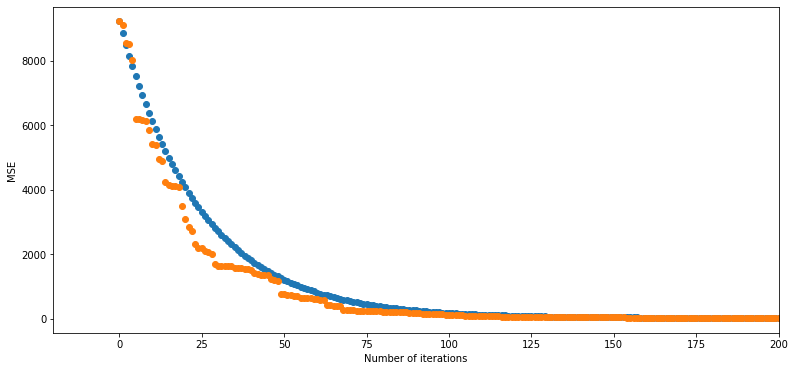

In [35]:
plt.figure(figsize=(13, 6))
plt.scatter(range(len(errors)), errors)
plt.scatter(range(len(errors_st)), errors_st)
plt.xlim(-20, 200)
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.show()

Классический градиентный спуск сходится быстрее.